#Installation Packages

In [1]:
!pip install opendatasets
!pip install pandas
!pip install sklearn

  Using cached sklearn-0.0.post11.tar.gz (3.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import opendatasets as od
import pandas as pd

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.metrics import RootMeanSquaredError

#Visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns

#Modelling packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from datetime import date
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [3]:
od.download(
    "https://www.kaggle.com/datasets/varpit94/microsoft-stock-data")

Skipping, found downloaded files in "./microsoft-stock-data" (use force=True to force download)


In [4]:
# reading the csv file
file =('/content/microsoft-stock-data/MSFT.csv')
df = pd.read_csv(file)

# displaying the contents of the csv file
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


# EDA

In [5]:
df.shape

(9083, 7)

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9083.000000,9083.000000,9083.000000,9083.000000,9083.000000,9.083000e+03
mean,41.324936,41.760887,40.878488,41.335628,36.256120,5.875055e+07
std,59.696905,60.272218,59.081728,59.714567,59.981436,3.845200e+07
min,0.088542,0.092014,0.088542,0.090278,0.057046,2.304000e+06
25%,4.050781,4.102051,4.027344,4.075195,2.575089,3.461230e+07
50%,26.820000,27.100000,26.520000,26.840000,18.948530,5.203200e+07
75%,40.034999,40.443751,39.500000,39.937500,29.244812,7.265400e+07
max,344.619995,349.670013,342.200012,343.109985,342.402008,1.031789e+09


In [7]:
# convert all column names to lower case
def lowercase (df):
  """ takes in a dataframe and converts all the columns headings to lower case and replaces spaces with an underscore"""
  for columns in df:
    df.columns= df.columns.str.lower()
    df.columns = df.columns.str.replace(' ', '_')

lowercase(df)
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')

In [8]:
df.isna().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       9083 non-null   object 
 1   open       9083 non-null   float64
 2   high       9083 non-null   float64
 3   low        9083 non-null   float64
 4   close      9083 non-null   float64
 5   adj_close  9083 non-null   float64
 6   volume     9083 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 496.9+ KB


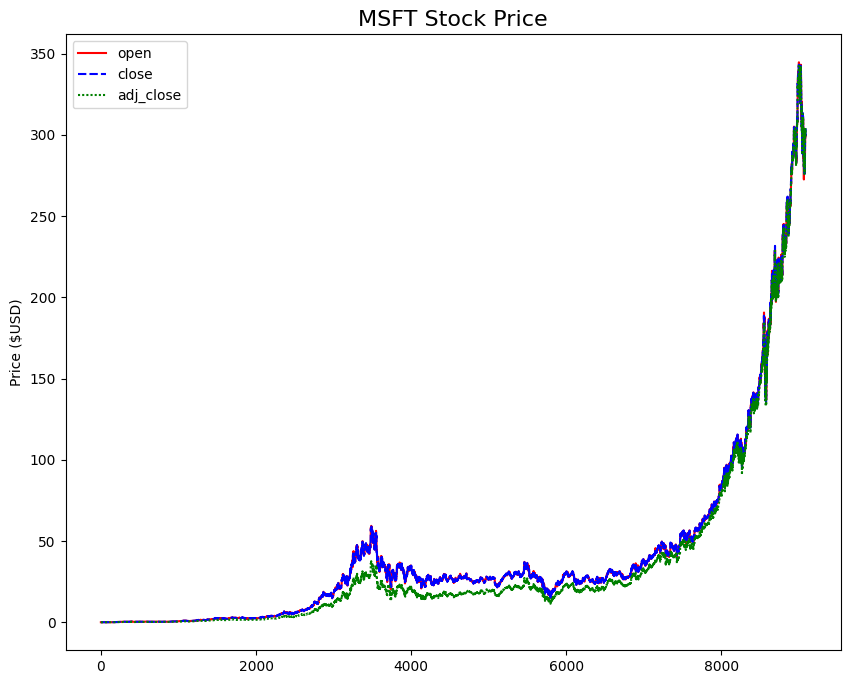

In [10]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df[['open', 'close', 'adj_close']], palette=['red', 'blue', 'green'])
plt.title('MSFT Stock Price', fontsize = 16)
plt.ylabel('Price ($USD)')
plt.show()

In [11]:
#Convert date colunm to datetime
df['date']= pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       9083 non-null   datetime64[ns]
 1   open       9083 non-null   float64       
 2   high       9083 non-null   float64       
 3   low        9083 non-null   float64       
 4   close      9083 non-null   float64       
 5   adj_close  9083 non-null   float64       
 6   volume     9083 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 496.9 KB


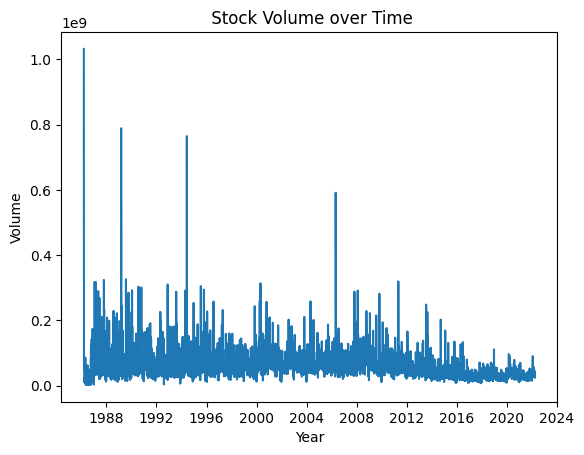

In [12]:
plt.plot(df['date'],
         df['volume'])
plt.title(' Stock Volume over Time')
plt.xlabel('Year')
plt.ylabel('Volume')

plt.show()

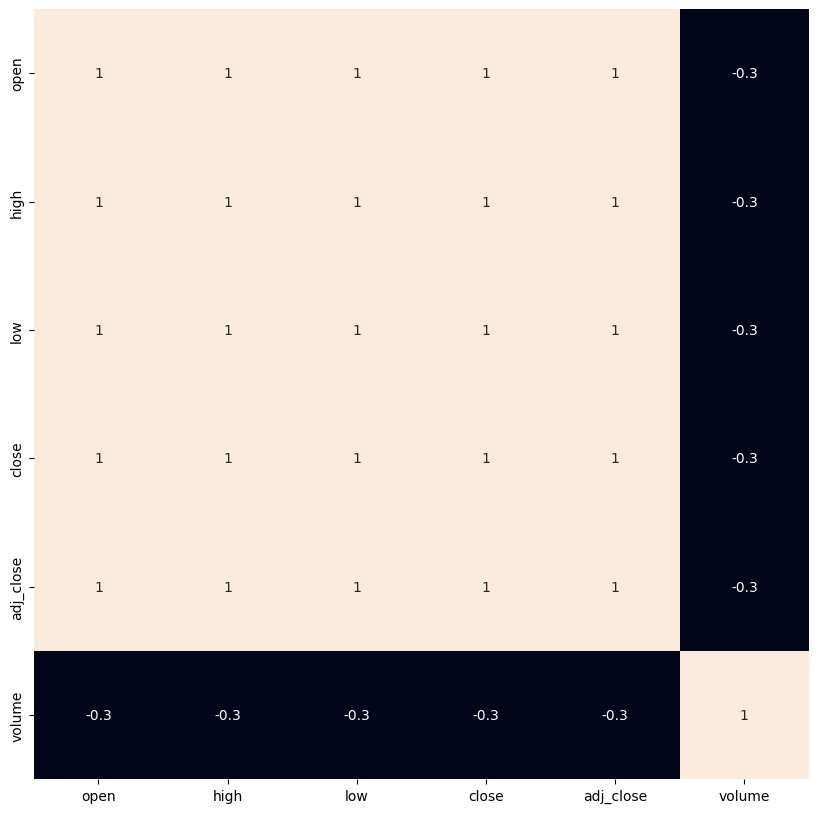

In [13]:
#Check feature correlation by visualising heatmap
plt.figure(figsize=(10,10))

sns.heatmap(df.corr()
            , annot = True, cbar=False)
plt.show()

In [14]:
#Remove unecessary columns
df = df.drop(['adj_close'], axis=1)
df.head()

,date,open,high,low,close,volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,47894400


# Model Preparation

In [15]:
#Prepare the training set samples
# Select a subset of the whole dataset (90%) as the training data and print out the training data length
close = df.filter(['close'])
dataset = close.values
training = int(np.ceil(len(dataset)* .90))
print(training)

8175


Above code explained:
1. The code takes a DataFrame called df and selects only the 'close' column, storing it in a new variable called close.

2. The values from the close column are then converted into an array and saved in a variable named dataset.

3. The variable training is calculated to represent 95% of the total data points in dataset, rounded up to the nearest whole number.

4. The code prints the value of training, showing how many data points will be used for training a machine learning model.



In [16]:
#Scale the data
#create a StandardScaler to scale the dataset, which means adjusting the data so it has a mean of 0 and a standard deviation of 1.
ss= StandardScaler()
#The scaler is applied to the dataset, transforming the data to have a mean of 0 and standard deviation of 1.
ss = ss.fit_transform(dataset)

#selects a portion of the scaled dataset for training, typically the first part.
train_data = ss[0:int(training), :]
#two empty lists, X_train and y_train, are created to store the features and labels (target values) for training data.These will be used to train a machine learning model.
X_train = []
y_train = []

1. ss= StandardScaler(): This line creates an instance of the StandardScaler class and assigns it to the variable ss. The StandardScaler is a preprocessing technique used to scale the data so that it has a mean of 0 and a standard deviation of 1.

2. ss = ss.fit_transform(dataset): This line applies the scaling transformation to the dataset. The fit_transform() method fits the scaler to the data and then transforms the data accordingly. After this line, the dataset is now scaled with a mean of 0 and standard deviation of 1.

3. train_data = ss[0:int(training), :]: This line creates a new variable train_data and assigns a portion of the scaled dataset to it. The data is sliced from index 0 to training-1. The value of training is assumed to be defined earlier in the code, representing the number of data points intended for training. The : in the second part means that all columns are included.

4. X_train = []: This line creates an empty list named X_train. This list will be used to store the features of the training data.

5. y_train = []: This line creates another empty list named y_train. This list will be used to store the labels (or target values) corresponding to the features in X_train.

So, to summarize, the code performs data scaling using StandardScaler, slices a portion of the scaled data for training, and creates empty lists to hold the features and labels for training data. The code suggests that the features are being prepared for some machine learning model where X_train will be used as input features and y_train as their corresponding labels.

In [17]:
#considering 60 as the batch size
#create x_train and y_train

#The code starts a loop that will process the data in chunks of 60 time steps.
for i in range(60, len(train_data)):
  #creates a sequence of 60 data points as one input feature for the model
  #Within the same loop, it captures a single data point as the target value to predict based on the input sequence.
  X_train.append(train_data[i-59:i, 0])
  y_train.append(train_data[i,0])

#converts the data from lists to more efficient numerical arrays
X_train, y_train = np.array(X_train), np.array(y_train)
#adjusts the shape of the data to make it suitable for training a time series model.
X_train = np.reshape (X_train, (X_train.shape[0], X_train.shape[1],1))


1. for i in range(60, len(train_data)):: This line starts a loop that iterates over a range of numbers, starting from 60 and going up to the length of train_data. This loop is intended to prepare the data for training a time series model, where the 60 suggests a sequence length for each input data point.

2. X_train.append(train_data[i-60:i, 0]): Inside the loop, this line appends a sequence of data to the X_train list. It takes a slice of train_data starting from i-60 (60 steps before the current index i) and ending at i (exclusive). The 0 at the end means that we are taking the first column (or the first feature) from the slice. This creates a sequence of 60 data points (time steps) as one input feature for the model.

3. y_train.append(train_data[i, 0]): This line appends a single data point to the y_train list. It takes the i-th data point from train_data and again selects the first column (or the first feature) from that data point. This corresponds to the target value (label) that the model needs to predict based on the input sequence.

4. X_train, y_train = np.array(X_train), np.array(y_train): After the loop, these lines convert the lists X_train and y_train into NumPy arrays. NumPy arrays are more efficient for numerical computations and are commonly used in machine learning tasks.

5. X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)): This line reshapes the X_train array to add an extra dimension, making it suitable for training a recurrent neural network (RNN) or a time-series-based model. The shape of X_train is transformed from (num_samples, 60) to (num_samples, 60, 1), where num_samples is the total number of sequences in the training data, 60 is the sequence length, and 1 represents the number of features (as we are dealing with univariate time series data).

In summary, the code prepares the training data for a time series model by creating input sequences of length 60 (based on historical data) and their corresponding target values. These sequences are stored in X_train and the corresponding targets in y_train. The data is then converted into NumPy arrays and reshaped to fit the requirements of a time-series-based model.

# Model Building

Building an RNN
- RNNs are hard to train and prune to vanishing gradient so use LSTM which is the RNN gated cell; LSTM reduces the problem of vanishing gradients

- RNNs are hard to train and prone to vanishing gradients:
-  - RNNs (Recurrent Neural Networks) have a problem called "vanishing gradient," which occurs during training. It means that the gradients (derivatives) of the error with respect to the weights of the RNN become extremely small as they are propagated back through time, causing slow or ineffective learning.
This vanishing gradient problem makes it difficult for RNNs to capture long-term dependencies in sequential data, limiting their ability to learn and retain important information over time.
- LSTM (Long Short-Term Memory) is an RNN gated cell:
- - LSTM is a variant of RNNs specifically designed to address the vanishing gradient problem and capture long-term dependencies effectively.
It introduces a gating mechanism that allows it to learn which information to remember, forget, and update in the context of sequential data.
The gating mechanism in LSTM allows it to mitigate the vanishing gradient problem and retain important information for longer periods, making it more suitable for modeling sequential data.

- LSTM reduces the problem of vanishing gradients:
- - The introduction of gates in LSTM enables it to control the flow of information within the network, which prevents the vanishing gradient problem to a large extent.
By learning when to keep information and when to forget it, LSTM can maintain relevant information for longer periods during training, making it easier to learn from sequences with long dependencies.
As a result, LSTM has an advantage over traditional RNNs when it comes to capturing long-term dependencies and avoiding the vanishing gradient problem.

In [18]:
# Importing necessary libraries
import keras

# Creating a sequential model
model = keras.models.Sequential()

# Adding a Long Short-Term Memory (LSTM) layer to the model with 64 units,
# returning sequences (necessary for stacking LSTM layers), and input shape as (X_train.shape[1], 1)
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(X_train.shape[1], 1)))

# Adding another LSTM layer to the model with 64 units
model.add(keras.layers.LSTM(units=64))

# Adding a Dense (fully connected) layer to the model with 128 units
model.add(keras.layers.Dense(128))

# Adding a Dropout layer with a rate of 0.5 to help prevent overfitting
model.add(keras.layers.Dropout(0.5))

# Adding a Dense (fully connected) layer to the model with 1 unit, for regression tasks
model.add(keras.layers.Dense(1))

# Printing the summary of the model architecture, showing the number of parameters and layer connections
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 59, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 58369 (228.00 KB)
Trainable params: 58369 (228.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


- This code creates a Sequential model with two LSTM layers, followed by two Dense layers with dropout regularization in between. The model is suitable for sequence data with one feature per time step and is designed for regression tasks with a single output value.






In [19]:
# Compiling the model with the Adam optimizer, mean absolute error (MAE) loss function,
# and using the RootMeanSquaredError metric to evaluate the model's performance.
model.compile(optimizer='adam',
              loss='mae',
              metrics=RootMeanSquaredError())

# Training the model on the training data (X_train and y_train) for 20 epochs.
# The training progress and performance metrics will be stored in the 'history' variable.
history = model.fit(X_train, y_train, epochs=20)


Epoch 1/20
254/254 [==============================] - 39s 123ms/step - loss: 0.0443 - root_mean_squared_error: 0.0672
Epoch 2/20
254/254 [==============================] - 18s 72ms/step - loss: 0.0343 - root_mean_squared_error: 0.0470
Epoch 3/20
254/254 [==============================] - 18s 71ms/step - loss: 0.0301 - root_mean_squared_error: 0.0421
Epoch 4/20
254/254 [==============================] - 17s 68ms/step - loss: 0.0302 - root_mean_squared_error: 0.0429
Epoch 5/20
254/254 [==============================] - 17s 68ms/step - loss: 0.0286 - root_mean_squared_error: 0.0408
Epoch 6/20
254/254 [==============================] - 17s 68ms/step - loss: 0.0263 - root_mean_squared_error: 0.0381
Epoch 7/20
254/254 [==============================] - 20s 81ms/step - loss: 0.0259 - root_mean_squared_error: 0.0371
Epoch 8/20
254/254 [==============================] - 18s 70ms/step - loss: 0.0248 - root_mean_squared_error: 0.0363
Epoch 9/20
254/254 [==============================] - 17s 68ms/

The Adam optimizer is an optimization algorithm used to update the parameters (weights and biases) of a neural network during the training process. It combines the advantages of two other popular optimizers, AdaGrad and RMSprop, to provide efficient and adaptive learning rates for each parameter. Adam stands for "Adaptive Moment Estimation" and is widely used in deep learning because it helps the model converge faster and handle sparse gradients effectively.

In the above code, "epochs" refer to the number of times the entire training dataset (Xtrain and y_train) is passed forward and backward through the neural network during the training process. Each epoch consists of one forward pass (where the input data is fed into the network, and the output is calculated) and one backward pass (where the model's parameters are updated using an optimization algorithm like Adam) to adjust the model's weights.

In other words, the training process is divided into a fixed number of epochs, and in each epoch, the model learns from the training data, gradually improving its ability to make accurate predictions. The number of epochs is a hyperparameter that can be adjusted based on the complexity of the problem and the size of the dataset to ensure that the model converges to an optimal solution without overfitting or underfitting.

# Model Evaluation

In [23]:
# Create a variable 'testing' by slicing the 'ss' array from index 'training - 60' to the end, including all columns.
testing = ss[training - 59:, :]

# Initialize an empty list 'X_test' to store the input data for testing.
X_test = []

# Create a variable 'y_test' by slicing the 'dataset' array from index 'training' to the end, including all columns.
y_test = dataset[training:, :]

# Iterate over the range from 60 to the length of 'testing'.
for i in range(59, len(testing)):

    # Append a sequence of 60 elements from 'testing' (indexed from 'i-60' to 'i') as a new element in 'X_test'.
    X_test.append(testing[i-59:i, 0])

# Convert 'X_test' list to a NumPy array.
X_test = np.array(X_test)

# Reshape 'X_test' to a 3D array with dimensions (number of samples, 60, 1).
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Use the 'model' to make predictions on the 'X_test' data and store the results in 'pred'.
pred = model.predict(X_test)


29/29 [==============================] - 1s 35ms/step


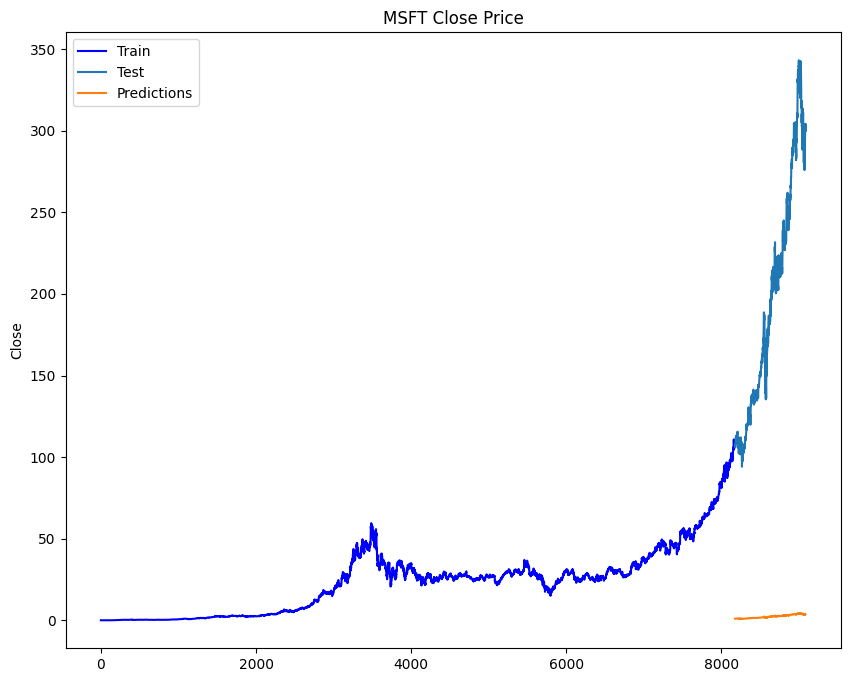

In [24]:
# Create a new DataFrame 'train' containing the data from 'df' up to the 'training' index (exclusive).
train = df[:training]

# Create a new DataFrame 'test' containing the data from 'df' starting from the 'training' index (inclusive) till the end.
test = df[training:]

# Add a new column named 'Predictions' to the 'test' DataFrame and assign the 'pred' values to it.
test['Predictions'] = pred

# Create a new figure for the plot with a size of 10x8 inches.
plt.figure(figsize=(10, 8))

# Plot the 'close' column from the 'train' DataFrame using blue color.
plt.plot(train['close'], c="b")

# Plot the 'close' and 'Predictions' columns from the 'test' DataFrame.
# The 'close' column will be plotted with its default color, and the 'Predictions' column will use the next available color.
plt.plot(test[['close', 'Predictions']])

# Set the title for the plot as 'MSFT Close Price'.
plt.title('MSFT Close Price')

# Set the label for the y-axis as 'Close'.
plt.ylabel("Close")

# Add a legend to the plot with labels ['Train', 'Test', 'Predictions'] to distinguish between the plotted lines.
plt.legend(['Train', 'Test', 'Predictions'])
